<H1> Assignment 11 </H1> 
<H3> Author: Shreya Kapoor </H3> 

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import hyperopt as hp
from sklearn import preprocessing

In [3]:
import numpy as np
import glob
import os 
import tensorflow as tf
tf.keras.backend.clear_session()
from tensorflow.keras.utils import to_categorical

In [4]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import l2

In [5]:
def preprocess(file):  
    data = [ x.split(',') for x in file.split('\n')[:-1]] # first split by the escape and then comma
    data = pd.DataFrame(data)
    data = data.replace('?', np.nan)
    data.dropna(inplace = True)
    return data

def load():
    columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','num']
    df = pd.DataFrame()
    path = "../UCI_data"
    for file in glob.glob(os.path.join(path, 'processed.*.data')):
        if 'processed' in file: 
            print (file)
            f = open(file).read()
            data = preprocess(f)
            df = df.append(data)
    df.columns = columns
    for i in range(len(df.columns)): 
        df.iloc[:,i] = pd.to_numeric(df.iloc[:,i])
    return df
    

In [6]:
df = load()

../UCI_data/processed.cleveland.data
../UCI_data/processed.switzerland.data
../UCI_data/processed.hungarian.data
../UCI_data/processed.va.data


In [7]:
df.head()
df.index = range(len(df))

In [8]:
len(df)

299

In [9]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [10]:
df['goal']= df['num'] >=1
df.goal = df.goal.astype(int)
df = df.drop(columns = ['num'])

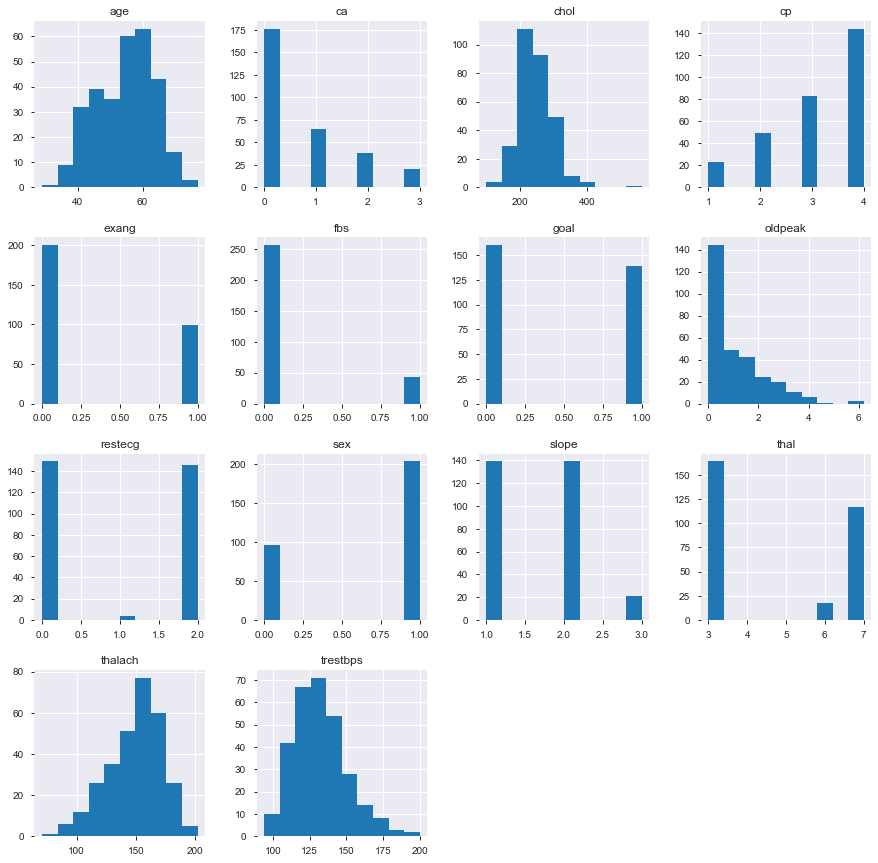

In [11]:
 c = df.hist(figsize = (15,15))

In our dataset we have the following categorical features for which we can use one hot encoding.
    - Sex (categorical) 0 female and 1 male
    - cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic 
    - 41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping 
     
The ordinal features are which can be left as they are since they can be scaled and used afterwards
    - Fasting blood pressure
         fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    - exang: exercise induced angina (1 = yes; 0 = no) 
    -restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
    - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 

In [12]:
df['sex'] = to_categorical(np.array(df['sex']))

In [13]:
df['cp'] = to_categorical(np.array(df['cp']))
df['slope'] = to_categorical(np.array(df['slope']))

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,0.0,0.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0,0.0,6.0,0
1,67.0,0.0,0.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,0.0,3.0,3.0,1
2,67.0,0.0,0.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,0.0,2.0,7.0,1
3,37.0,0.0,0.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0,0.0,3.0,0
4,41.0,1.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0,0.0,3.0,0


In [15]:


x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.708333,0.0,0.0,0.481132,0.286638,1.0,1.0,0.603053,0.0,0.370968,0.0,0.000000,0.75,0.0
1,0.791667,0.0,0.0,0.622642,0.400862,0.0,1.0,0.282443,1.0,0.241935,0.0,1.000000,0.00,1.0
2,0.791667,0.0,0.0,0.245283,0.278017,0.0,1.0,0.442748,1.0,0.419355,0.0,0.666667,1.00,1.0
3,0.166667,0.0,0.0,0.339623,0.323276,0.0,0.0,0.885496,0.0,0.564516,0.0,0.000000,0.00,0.0
4,0.250000,1.0,0.0,0.339623,0.224138,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0.0


Try: One hot encoding for the categorical values 

To train: Bottleneck autoencoder

In [17]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','goal']

In [18]:
df.columns =  columns

In [19]:
df.reindex(range(len(df))).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,0.708333,0.0,0.0,0.481132,0.286638,1.0,1.0,0.603053,0.0,0.370968,0.0,0.000000,0.75,0.0
1,0.791667,0.0,0.0,0.622642,0.400862,0.0,1.0,0.282443,1.0,0.241935,0.0,1.000000,0.00,1.0
2,0.791667,0.0,0.0,0.245283,0.278017,0.0,1.0,0.442748,1.0,0.419355,0.0,0.666667,1.00,1.0
3,0.166667,0.0,0.0,0.339623,0.323276,0.0,0.0,0.885496,0.0,0.564516,0.0,0.000000,0.00,0.0
4,0.250000,1.0,0.0,0.339623,0.224138,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns= ['goal']), df['goal'], test_size = 0.2)

In [21]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Model


In [22]:
from tensorflow.keras.callbacks import TensorBoard

In [23]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.optimizers import Adam
import numpy as np
import time
import sys
 

![title](picture.png)
Image from Slides Prof. Frohlich

## According to the task described by the exercise!

![title](Autoencoders.png)
Image from Jeremy Jordan https://www.jeremyjordan.me/autoencoders/

In [24]:
# for batch normalisation we set the use_bias flag to false!

In [25]:
l_2 = [ 0.01, 0.1, 1]
learning_rate = [0.1, 0.01, 1]
batch_size = [16,20,24]
epochs = [100,200]

space = {'batch_size': hp.choice('batch_size', batch_size),
         'epochs': hp.choice('epochs', epochs),
         'l2': hp.choice('l2', l_2), 
         'learning_rate': hp.choice('learning_rate', learning_rate )
         }

In [26]:
def create_model(params): 

    input_values = Input(shape=(13,)) # no batch normalisation of the input is done
    encoded_1 = Dense(13//2, activation='tanh', bias_regularizer=l2(params['l2']))(input_values)
    encoded_1 = BatchNormalization() (encoded_1)
    encoded_2 = Dense(13//4, activation = 'tanh', bias_regularizer=l2(params['l2'])) (encoded_1)
    encoded_2 = BatchNormalization()(encoded_2)
    encoded = Dense(2, activation = 'tanh', bias_regularizer=l2(params['l2'])) (encoded_2)
    encoded = BatchNormalization() (encoded)
    decoded_1 = Dense(13//4, activation = 'tanh' , bias_regularizer=l2(params['l2']))(encoded)
    decoded_1 = BatchNormalization() (decoded_1)
    decoded_2 = Dense(13//2, activation = 'tanh', bias_regularizer=l2(params['l2'])) (decoded_1)
    decoded_2 = BatchNormalization() (decoded_2)
    decoded = Dense(13, activation='tanh', bias_regularizer=l2(params['l2']))(decoded_2)
    autoencoder = Model(input_values, decoded)
    autoencoder.compile(loss = 'MSE', optimizer = Adam(lr= params['learning_rate']))
    history = autoencoder.fit(np.array(X_train), np.array(X_train),
                epochs = params['epochs'],
                shuffle=True,
                validation_data = (np.array(X_test), np.array(X_test)), verbose = 0, 
                           batch_size=params['batch_size'])
    # history is stored at /tmp/autoencoder/i we can see this by logging into this place!
    decoded_vals = autoencoder.predict(np.array(X_test))
    mse = sum(sum((np.array(X_test)- decoded_vals)**2))/len(X_test)
    print('MSE:', mse)
    sys.stdout.flush()
    return {'loss': mse, 'status': STATUS_OK}

In [27]:
start_time = time.time()
trials = Trials()
best = fmin(create_model, space, algo=tpe.suggest, max_evals = 10, trials=trials)
 
elapsed_time_Ho = time.time() - start_time

MSE:                                                  
0.5431033614470053                                    
MSE:                                                                            
1.2854778354069476                                                              
MSE:                                                                            
1.3127911764405262                                                              
MSE:                                                                            
0.6824953092064586                                                              
MSE:                                                                            
12.95430293065416                                                               
MSE:                                                                            
1.3059214911688624                                                              
MSE:                                                                            

In [28]:
best

{'batch_size': 1, 'epochs': 1, 'l2': 2, 'learning_rate': 1}

argmin : dictionary
    If return_argmin is True returns `trials.argmin` which is a dictionary.  Otherwise
    this function  returns the result of `hyperopt.space_eval(space, trails.argmin)` if there
    were succesfull trails. This object shares the same stru

!tensorboard --logdir=/tmp/autoencoder

In [29]:
best_params = { 'batch_size': batch_size[best['batch_size']], 
                 'epochs': epochs[best['epochs']], 
               'l2': l_2[best['l2']], 
               'learning_rate': learning_rate[best['learning_rate']]
         }

In [30]:
best_params

{'batch_size': 20, 'epochs': 200, 'l2': 1, 'learning_rate': 0.01}

In [31]:
def make_model(params):  
    input_values = Input(shape=(13,)) # no batch normalisation of the input is done
    encoded_1 = Dense(13//2, activation='tanh', bias_regularizer=l2(params['l2']))(input_values)
    encoded_1 = BatchNormalization() (encoded_1)
    encoded_2 = Dense(13//4, activation = 'tanh', bias_regularizer=l2(params['l2'])) (encoded_1)
    encoded_2 = BatchNormalization()(encoded_2)
    encoded = Dense(2, activation = 'tanh', bias_regularizer=l2(params['l2'])) (encoded_2)
    encoded = BatchNormalization() (encoded)
    decoded_1 = Dense(13//4, activation = 'tanh' , bias_regularizer=l2(params['l2']))(encoded)
    decoded_1 = BatchNormalization() (decoded_1)
    decoded_2 = Dense(13//2, activation = 'tanh', bias_regularizer=l2(params['l2'])) (decoded_1)
    decoded_2 = BatchNormalization() (decoded_2)
    decoded = Dense(13, activation='tanh', bias_regularizer=l2(params['l2']))(decoded_2)
    autoencoder = Model(input_values, decoded)
    autoencoder.compile(loss = 'MSE', optimizer = Adam(lr = params['learning_rate']))
    history = autoencoder.fit(np.array(X_train), np.array(X_train),
                epochs = params['epochs'],
                shuffle=True,
                validation_data = (np.array(X_test), np.array(X_test)), verbose = 0, callbacks=
                                   [TensorBoard(log_dir='/tmp/autoencoder'+ 'bestmodelxx')], 
                           batch_size=params['batch_size'])
    # history is stored at /tmp/autoencoder/i we can see this by logging into this place!
    decoded_vals = autoencoder.predict(np.array(X_test))
    mse = sum(sum((np.array(X_test)- decoded_vals)**2))/len(X_test)
    
    return autoencoder

In [32]:
def visualize_layer(model,num_layer, X_test, y_test, params): 
    
    encoded_output  = model.layers[num_layer].output #output after batch normalisation
    encoder = Model(inputs=model.input, outputs=encoded_output) # Creates a model that will return these outputs, given the model input
    encoded_vals = encoder.predict(np.array(X_test), batch_size=params['batch_size'], verbose = 1)
    color_dict = {1: 'red', 0:'blue'}
    colors = np.vectorize(color_dict.get)(y_test)
    plt.scatter([x[0] for x in encoded_vals], [x[1] for x in encoded_vals], c = colors)

In [33]:
autoencoder = make_model(best_params)

60/60 [==============================] - 0s 2ms/sample


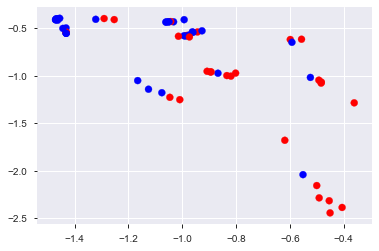

In [34]:
visualize_layer(autoencoder, len(autoencoder.layers)//2, X_test, y_test, best_params)

In [35]:
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
dense_60 (Dense)             (None, 6)                 84        
_________________________________________________________________
batch_normalization_50 (Batc (None, 6)                 24        
_________________________________________________________________
dense_61 (Dense)             (None, 3)                 21        
_________________________________________________________________
batch_normalization_51 (Batc (None, 3)                 12        
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 8         
_________________________________________________________________
batch_normalization_52 (Batc (None, 2)                 8  

## Visualizing the results from the best model

In [36]:
!tensorboard --logdir=/tmp/autoencoderbestmodelxx

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.0.2 at http://localhost:6006/ (Press CTRL+C to quit)
^C


<img src="tensorboard.png">

In [37]:
X_test_pred = autoencoder.predict(np.array(X_test)) 
results = autoencoder.evaluate( X_test_pred,np.array(X_test) )
#MSE
sum(sum(np.square(np.array(X_test)-X_test_pred))**0.5)/len(X_test)

60/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.3653192723237412